In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import itertools

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
def gabor_filter(
    X,
    Y,
    X_mean=0.0,
    Y_mean=0.0,
    # # Parameters (replace with extracted values from your data)
    A=1.0,  # Amplitude
    sigma_x=1.0,  # Gaussian envelope width along x
    sigma_y=1.0,  # Gaussian envelope width along y
    gamma=1.0,
    f=0.5,  # Spatial frequency
    theta=np.pi / 4,  # Preferred orientation (radians)
    phi_0=np.pi / 3,  # Preferred phase (radians)
    theta_gauss=np.pi / 4.0,
):
    """
    I guess sigma_x and sigma_y have to be translated / rotated as well -> see covariance matrix!
    Does this also hold implications for FoV in V1, if x/y space are not entirely symmetric / have same bounds, etc?
    """
    X = X - X_mean
    Y = Y - Y_mean
    print(X)
    print(Y)
    # Rotate coordinates
    x_prime = X * np.cos(theta) + Y * np.sin(theta)
    y_prime = -X * np.sin(theta) + Y * np.cos(theta)

    # print(f"{theta=}, {theta_gauss=}")
    if theta_gauss:
        x_prime_gauss = x_prime * np.cos(theta_gauss) + y_prime * np.sin(theta_gauss)
        y_prime_gauss = -x_prime * np.sin(theta_gauss) + y_prime * np.cos(theta_gauss)
    else:
        x_prime_gauss = x_prime
        y_prime_gauss = y_prime

    print(x_prime)
    # Gabor function
    return (
        A
        * np.exp(
            -(
                x_prime_gauss**2 / (2 * sigma_x**2)
                + gamma**2 * y_prime_gauss**2 / (2 * sigma_y**2)
            )
        )
        * np.cos(2 * np.pi * f * x_prime + phi_0)
    )

In [34]:
steps = 100

# stimulus_range = [-100, 100]
frequency_range = [1, 100.0]
phase_range = [0.0, 2 * np.pi]
f_input, phi_input = np.meshgrid(
    np.linspace(frequency_range[0], frequency_range[1], steps),
    np.linspace(phase_range[0], phase_range[1], steps),
)

[[-39. -38. -37. ...  58.  59.  60.]
 [-39. -38. -37. ...  58.  59.  60.]
 [-39. -38. -37. ...  58.  59.  60.]
 ...
 [-39. -38. -37. ...  58.  59.  60.]
 [-39. -38. -37. ...  58.  59.  60.]
 [-39. -38. -37. ...  58.  59.  60.]]
[[-2.5        -2.5        -2.5        ... -2.5        -2.5
  -2.5       ]
 [-2.43653348 -2.43653348 -2.43653348 ... -2.43653348 -2.43653348
  -2.43653348]
 [-2.37306696 -2.37306696 -2.37306696 ... -2.37306696 -2.37306696
  -2.37306696]
 ...
 [ 3.65625227  3.65625227  3.65625227 ...  3.65625227  3.65625227
   3.65625227]
 [ 3.71971879  3.71971879  3.71971879 ...  3.71971879  3.71971879
   3.71971879]
 [ 3.78318531  3.78318531  3.78318531 ...  3.78318531  3.78318531
   3.78318531]]
[[-2.5        -2.5        -2.5        ... -2.5        -2.5
  -2.5       ]
 [-2.43653348 -2.43653348 -2.43653348 ... -2.43653348 -2.43653348
  -2.43653348]
 [-2.37306696 -2.37306696 -2.37306696 ... -2.37306696 -2.37306696
  -2.37306696]
 ...
 [ 3.65625227  3.65625227  3.65625227 ...  3.6

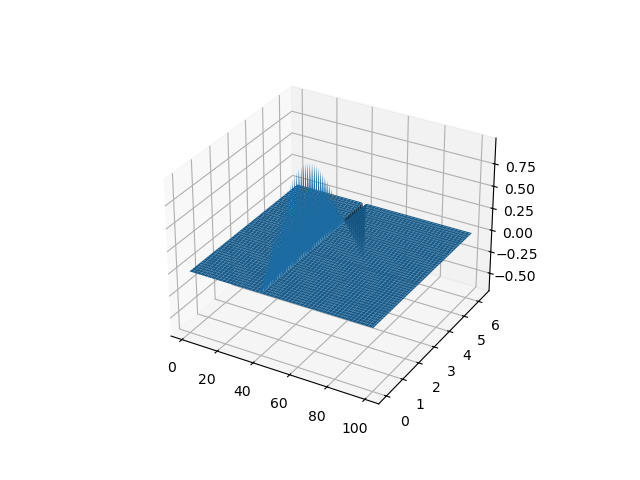

In [54]:
G = gabor_filter(
    f_input,
    phi_input,
    40.0,
    2.5,
    1.0,
    10.0,
    np.pi / 10.0,
    1.0,
    0.1,
    0.0 / 180.0 * np.pi,
    0.0,
    0.0,
)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(f_input, phi_input, G)
plt.show()